<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/5_Kinds_of_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
# fls_train='/content/drive/MyDrive/MyPicture/Flowers_Data/Train'
# fls_test ='/content/drive/MyDrive/MyPicture/Flowers_Data/Test'

In [33]:
### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)


In [72]:
train_data = train.flow_from_directory('/content/drive/MyDrive/MyPicture/Flowers_Data/Train', target_size=(150,150), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/MyPicture/Flowers_Data/Test', target_size=(150,150), class_mode='categorical')

Found 234 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [56]:
model= Sequential()
## lop CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(150,150,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=64
epochs =30
classes =5

In [57]:
# chuyen du lieu tu CNN ve ANN ( 2 chieu ve 1 chieu)
model.add(Flatten())
##lop hidden1
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
# lop outpu
model.add(Dense(classes, activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                 

In [59]:
history=model.fit(train_data,epochs=50,batch_size=128,verbose=1, 
                  validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 31s 4s/step - loss: 1.9654 - accuracy: 0.3932 - val_loss: 1.1430 - val_accuracy: 0.5200
Epoch 2/50
8/8 [==============================] - 4s 580ms/step - loss: 1.0341 - accuracy: 0.6026 - val_loss: 0.9855 - val_accuracy: 0.5800
Epoch 3/50
8/8 [==============================] - 4s 448ms/step - loss: 0.8166 - accuracy: 0.7308 - val_loss: 0.9754 - val_accuracy: 0.6200
Epoch 4/50
8/8 [==============================] - 4s 450ms/step - loss: 0.6674 - accuracy: 0.7650 - val_loss: 0.9336 - val_accuracy: 0.6200
Epoch 5/50
8/8 [==============================] - 6s 736ms/step - loss: 0.5003 - accuracy: 0.8248 - val_loss: 0.7706 - val_accuracy: 0.7800
Epoch 6/50
8/8 [==============================] - 4s 448ms/step - loss: 0.3971 - accuracy: 0.8846 - val_loss: 0.6808 - val_accuracy: 0.7400
Epoch 7/50
8/8 [==============================] - 4s 501ms/step - loss: 0.2656 - accuracy: 0.9145 - val_loss: 0.9323 - val_accuracy: 0.6600
Epoch 8/50
8/8 [======

<ipython-input-73-f390141d929e>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


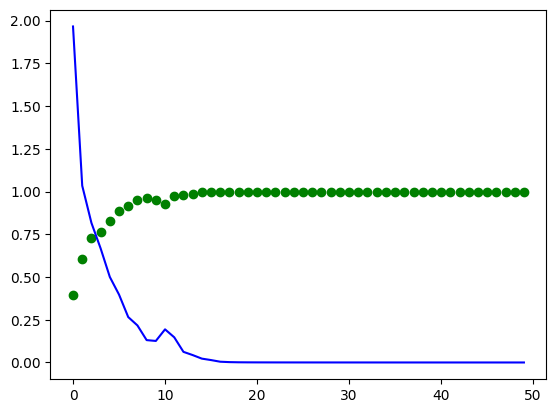

In [73]:
model.save('/content/drive/MyDrive/MyPicture/Flowers_Data/model_fl.h5')
accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

In [85]:

# from tensorflow.keras.preprocessing import image
# def predict(filename):
#     img1 = image.load_img(filename, target_size=(150,150))
    
#     plt.imshow(img1)
#     Y = image.img_to_array(img1)
#     X = np.expand_dims(Y, axis=0)
#     val = model.predict(X)
#     print(val)
#     if val == 1:
#         plt.xlabel("Apricot")
#     elif val == 2:
#         plt.xlabel("Daisy")
#     elif val == 3:
#       plt.xlabel("Lotus")
#     elif val == 4:
#       plt.xlabel("Peach")
#     elif val == 5:
#       plt.xlabel("Rose")

1/1 [==============================] - 0s 20ms/step
Predicted:  Apricot


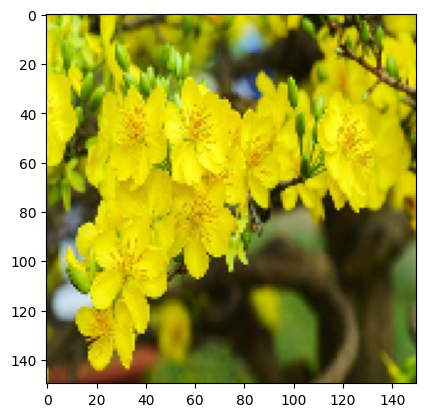

In [99]:

name_fl=['Apricot', 'Daisy','Lotus','Peach','Rose']
filePath = '/content/drive/MyDrive/MyPicture/Flowers_Data/fl.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_fl[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 26ms/step
Predicted:  Lotus


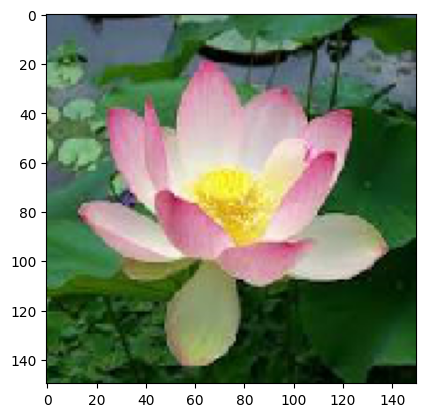

In [102]:
filePath = '/content/drive/MyDrive/MyPicture/Flowers_Data/sne.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_fl[pred])
plt.imshow(testImage)